In [2]:
from IPython.core.magic import register_line_magic
from IPython.display import display, Javascript

@register_line_magic
def rerun(line):
    
    if len(line) > 0:
        try:
            seconds = int(line)
        except:
            raise ValueError('Could not understand %d as a time in (integral) '
                             'seconds after which to rerun the cell')
    else:
        seconds = 10

    js = """
    var interval = %d;

    var cell_elt  = this.element[0].parentElement.parentElement;
    var cell      = $(cell_elt).data('cell');
    var idx       = IPython.notebook.find_cell_index(cell);
    var lock_name = "rerun_lock_" + idx

    if (sessionStorage.getItem(lock_name) === null) {
        sessionStorage.setItem(lock_name, "off");
        console.log('setting first lock for cell :: ' + idx + ' :: OFF');
    };

    element.append('cell will rerun in: ' + interval + ' seconds');

    if  ( sessionStorage.getItem(lock_name) === 'off' ) {

        console.log('rerunning cell :: ' + idx);
        sessionStorage.setItem(lock_name, "on");
        console.log('lock for cell :: ' + idx + ' :: ON');

        setTimeout(function(){
            cell.execute();
            console.log('ran cell ' + idx);
            sessionStorage.setItem(lock_name, "off");
            console.log('lock for cell :: ' + idx + ' :: OFF');
        }, interval * 1000);

    };
    """ % seconds

    js_obj = Javascript(js)
    display(js_obj)

    return line

In [3]:
i = 0

In [461]:
#%rerun 3
i += 1
print i

438


## Now let's use it with redis

In [431]:
from pscache.client import Client
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [433]:
c = Client('sine')

<IPython.core.display.Javascript object>

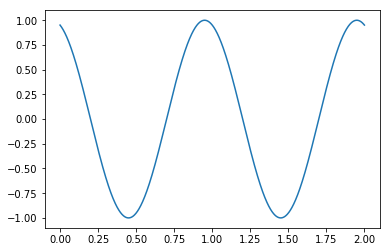

In [526]:
%rerun 2
data = c.query()
if data is not None:
    plot(data['x'], data['y'])